# Photometric Case

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import numpy as np
%matplotlib inline

from zbeamsfunctions import mu_w,likelihood,likelihood_phot,contour
from mcmcfunctions import mcmc,mcmc_phot

In [3]:
z_true,z_obs,mu_obs = np.loadtxt('fakedata_photometric.txt',usecols=[0,1,2],unpack=True)

In [15]:
len(mu_obs)

998

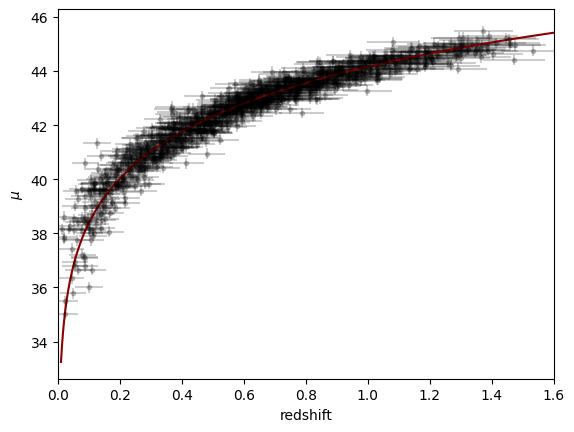

In [4]:
plt.errorbar(z_obs,mu_obs,xerr=0.04*(1+z_obs),yerr=0.2*np.ones(len(z_obs)),fmt='.k',alpha=0.2)

z_vec = np.linspace(.01,1.6,1000)
mu_vec = np.vectorize(mu_w)
plt.plot(z_vec,mu_vec(z_vec,0.31,67.74,-1),color='darkred')

plt.xlim([0,1.6])
plt.xlabel('redshift')
plt.ylabel(r'$\mu$')
plt.show()

In [6]:
#generating the unbiased mcmc chain

mcmc(50000,                          #number of steps
     likelihood,                     #which likelihood function to use
     'nobias',                       #bias: indicates the z dataset to use
     'photometric',                  #bias: indicates the mu dataset to use
     0.3,70,-1,                      #starting points (OMi,H0i,wi)
     0.0295,0.3965,0.0785,           #step sizes (omstep,H0step,wstep)
     'fakedata_photometric.txt',     #input file (dataset)
     'chains/mcmc_chain_nb.txt',     #output file (chain)
     True)                           #show the statusbar 

Generating posterior
[                                                  ]0%

[##################################################]100%
done


In [7]:
#generating the biased mcmc chain

mcmc(50000,                          #number of steps
     likelihood,                     #which likelihood function to use
     'bias',                         #bias: indicates the z dataset to use
     'photometric',                  #bias: indicates the mu dataset to use
     0.3,70,-1,                      #starting points (OMi,H0i,wi)
     0.059,0.793,0.175,              #step sizes (omstep,H0step,wstep)
     'fakedata_photometric.txt',     #input file (dataset)
     'chains/mcmc_chain_bi.txt',     #output file (chain)
     True)                           #show the statusbar 

Generating posterior
[                                                  ]0%

[##################################################]100%
done


In [11]:
import sys, importlib
importlib.reload(sys.modules['mcmcfunctions'])
from mcmcfunctions import mcmc_phot

In [12]:
#generating the zBEAMS mcmc chain

mcmc_phot(10,#250000,                       #number of steps
          1,                            #number of blocks
          45000,                        #burnin
          4,                            #thinning
          likelihood_phot,              #which likelihood function to use
          0.31,67.74,-1,3,              #starting points (OMi,H0i,wi,bi)
          0.0295,0.3965,0.0875,1.8,0,   #step sizes (omstep,H0step,wstep,zstep,bstep)
          'fakedata_photometric.txt',   #input file (dataset)
          'chains/mcmc_chain_zb.txt',   #output file (chain)
          True)                         #show the statusbar 

Generating posterior
MC1 [548]
z_proposed 998 [0.37467936 1.04891682 0.62489137 1.15764614 0.5395499  0.73318398
 0.57936655 0.78701594 0.37137835 0.94192817 0.77152386 0.24124316
 0.70210145 0.37302131 0.45019003 0.64744182 0.12756013 0.10043152
 0.50199444 0.38918226 1.10357882 0.68137053 0.79153552 0.42351739
 0.37717383 1.00846771 0.21378039 0.39065954 1.160858   0.70927447
 0.91131621 0.90563379 0.30458322 0.88632637 1.30031156 1.08048031
 1.28200994 0.5329411  1.24356744 0.68624157 0.27082787 0.59304784
 0.31959531 0.65685033 0.65871597 0.43410971 0.46623329 0.62356405
 0.237462   1.22160618 0.71039091 0.46013654 0.64953754 0.27376959
 1.02203034 0.19322371 0.63505653 0.89087065 0.92866496 1.05575929
 0.61432907 0.71966966 0.1536004  1.00672192 1.03504883 0.6574734
 0.87837665 0.83045908 0.3039611  0.46924916 0.80930389 0.98386989
 0.58599222 0.62617027 0.14417113 0.15954723 0.66421452 1.09654599
 1.1070587  0.16775507 0.80510425 0.44839278 0.77024865 0.51811305
 0.3282183  0.278

MC1 [428]
z_proposed 998 [0.37467936 1.04891682 0.62489137 1.15764614 0.5395499  0.73318398
 0.57936655 0.78701594 0.37137835 0.94192817 0.77152386 0.24124316
 0.70210145 0.37302131 0.45019003 0.64744182 0.12756013 0.10043152
 0.50199444 0.38918226 1.10357882 0.68137053 0.79153552 0.42351739
 0.37717383 1.00846771 0.21378039 0.39065954 1.160858   0.70927447
 0.91131621 0.90563379 0.30458322 0.88632637 1.30031156 1.08048031
 1.28200994 0.5329411  1.24356744 0.68624157 0.27082787 0.59304784
 0.31959531 0.65685033 0.65871597 0.43410971 0.46623329 0.62356405
 0.237462   1.22160618 0.71039091 0.46013654 0.64953754 0.27376959
 1.02203034 0.19322371 0.63505653 0.89087065 0.92866496 1.05575929
 0.61432907 0.71966966 0.1536004  1.00672192 1.03504883 0.6574734
 0.87837665 0.83045908 0.3039611  0.46924916 0.80930389 0.98386989
 0.58599222 0.62617027 0.14417113 0.15954723 0.66421452 1.09654599
 1.1070587  0.16775507 0.80510425 0.44839278 0.77024865 0.51811305
 0.3282183  0.27815866 0.68663123 1.08

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/interpolate/_fitpack_impl.py:975: RuntimeWarning: A theoretically impossible result when finding a smoothing spline
with fp = s. Probable causes: s too small or badly chosen eps.
(abs(fp-s)/s>0.001)
	kx,ky=3,3 nx,ny=24,9 m=2500 fp=13917603.849196 s=200000.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


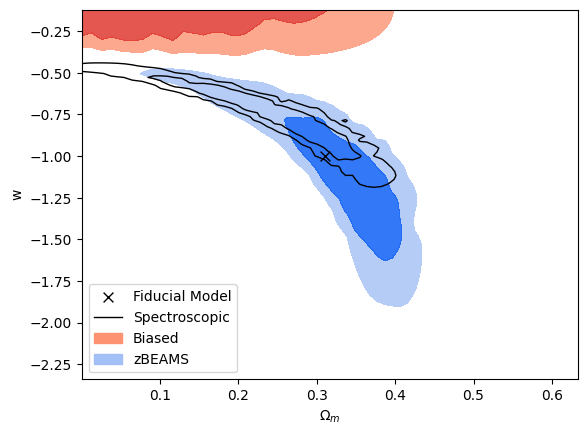

In [9]:
nb_mcmc_file = 'chains/mcmc_chain_nb.txt'
bi_mcmc_file = 'chains/mcmc_chain_bi.txt'
zb_mcmc_file = 'chains/mcmc_chain_zb.txt'

om_nb,H0_nb,w_nb = np.loadtxt(nb_mcmc_file, usecols=[0,1,2],unpack=True)
om_bi,H0_bi,w_bi = np.loadtxt(bi_mcmc_file, usecols=[0,1,2],unpack=True)
om_zb,H0_zb,w_zb = np.loadtxt(zb_mcmc_file, usecols=[0,1,2],unpack=True)

c_nb = np.loadtxt(nb_mcmc_file,usecols=[0,2])
c_bi = np.loadtxt(bi_mcmc_file,usecols=[0,2])
c_zb = np.loadtxt(zb_mcmc_file,usecols=[0,2])
N100_nb,N95_nb,N68_nb,X_nb,Y_nb,Z_nb = contour(c_nb,[0,1],smooth=21e4,line=True)
N100_bi,N95_bi,N68_bi,X_bi,Y_bi,Z_bi = contour(c_bi,[0,1],smooth=20e4,line=False)
N100_zb,N95_zb,N68_zb,X_zb,Y_zb,Z_zb = contour(c_zb,[0,1],smooth=16e4,line=False)
col0 = ('#a3c0f6','#0057f6')#light blue;dark blue
col1 = ('#fc9272','#de2d26')#light red;dark red
col2 = ('k','k')

cs0 = plt.contourf(X_bi,Y_bi,Z_bi,levels=[N95_bi,N68_bi,N100_bi],colors=col1,alpha=0.8)
cs1 = plt.contourf(X_zb,Y_zb,Z_zb,levels=[N95_zb,N68_zb,N100_zb],colors=col0,alpha=0.8)
cs2 = plt.contour(X_nb,Y_nb,Z_nb,levels=[N95_nb,N68_nb,N100_nb],colors=col2,alpha=1.0,linewidths=1)
cs3 = plt.scatter(0.31,-1,s=50,linewidth=1,marker='x',c='k',label='Fiducial Model')
plt.ylabel('w')
plt.xlabel(r'$\Omega_m$')

patch7 = mpatches.Patch(color=col0[0], label='zBEAMS')
patch8 = mpatches.Patch(color=col1[0], label='Biased',ls='solid',lw=1)
patch9 = mlines.Line2D([],[],color=col2[0],linewidth=1, label='Spectroscopic')
plt.legend(handles=[cs3,patch9,patch8,patch7],loc=3)
plt.show()